In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [311]:
# Datasets
set = ['SPY', 'DIA', 'QQQ']
for ticker in set:
    
    df = pd.read_csv(ticker+'.csv') # Define dataset

    print(f'{df.head()}\t{df.shape[0]} ${ticker} samples')

         Date      Open      High       Low     Close  Adj Close   Volume
0  1993-01-29  43.96875  43.96875  43.75000  43.93750  26.299288  1003200
1  1993-02-01  43.96875  44.25000  43.96875  44.25000  26.486324   480500
2  1993-02-02  44.21875  44.37500  44.12500  44.34375  26.542448   201300
3  1993-02-03  44.40625  44.84375  44.37500  44.81250  26.822998   529400
4  1993-02-04  44.96875  45.09375  44.46875  45.00000  26.935240   531500	6843 $SPY samples
         Date      Open       High       Low     Close  Adj Close   Volume
0  1998-01-20  77.81250  78.843750  77.40625  78.81250  48.573048  1744600
1  1998-01-21  78.09375  78.375000  77.28125  77.84375  47.975971  1839600
2  1998-01-22  77.18750  77.859375  76.93750  77.18750  47.571541  1662600
3  1998-01-23  77.50000  77.750000  76.31250  77.00000  47.455948  1693700
4  1998-01-26  77.37500  77.671875  76.93750  77.31250  47.648571  1172800	5587 $DIA samples
         Date      Open       High       Low    Close  Adj Close   Vol

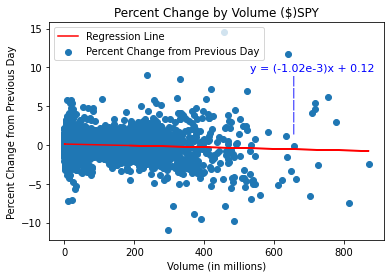

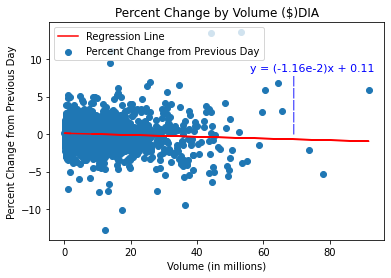

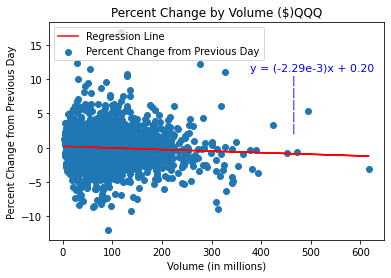

In [121]:
set = ['SPY', 'DIA', 'QQQ']
for ticker in set:
    
    # Define dataset
    df = pd.read_csv(ticker+'.csv')

    # Calculate percent change from the previous day
    df['PercentChange'] = df['Close'].pct_change() * 100

    # Drop NaN values resulting from the percent change calculation
    df = df.dropna()

    # Extracting relevant columns
    X = df['Volume'].values.reshape(-1, 1) / 1e6
    y = df['PercentChange']

    # Create scatter plot
    plt.scatter(X, y, label='Percent Change from Previous Day')

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Plot regression line
    plt.plot(X, y_pred, color='red', label='Regression Line')

    # Format the coefficient in the regression equation
    coef_str = "{:0.2e}".format(model.coef_[0]).replace("e-0", "e-")
    intercept_str = "{:0.2f}".format(model.intercept_)

    # Display equation for the regression line
    indent = '\n            |'
    equation = f'y = ({coef_str})x + {intercept_str} {indent * 5}
    plt.annotate(equation, xy=(0.6, 0.5), xycoords='axes fraction', fontsize=11, color='blue')

    # Customize plot
    plt.title(f'Percent Change by Volume ($){ticker}')
    plt.xlabel('Volume (in millions)')
    plt.ylabel('Percent Change from Previous Day')
    plt.legend(loc='upper left')  # Set the legend location to the top left
    plt.show()

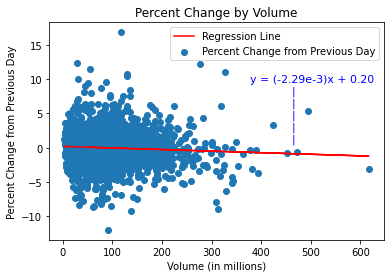

In [181]:

# Define Dataset
df = pd.read_csv("QQQ.csv")

# Calculate percent change from the previous day
df['PercentChange'] = df['Close'].pct_change() * 100

# Drop NaN values resulting from the percent change calculation
df = df.dropna()

# Extracting relevant columns
X = df['Volume'].values.reshape(-1, 1) / 1e6
y = df['PercentChange']

# Create scatter plot
plt.scatter(X, y, label='Percent Change from Previous Day')

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

# Format the coefficient in the regression equation
coef_str = "{:0.2e}".format(model.coef_[0]).replace("e-0", "e-")
intercept_str = "{:0.2f}".format(model.intercept_)

# Display equation for the regression line
indent = '\n            |'
equation = f"y = ({coef_str})x + {intercept_str} {indent * 5}"
plt.annotate(equation, xy=(0.6, 0.45), xycoords='axes fraction', fontsize=11, color='blue')

# Customize plot
plt.title('Percent Change by Volume')
plt.xlabel('Volume (in millions)')
plt.ylabel('Percent Change from Previous Day')
plt.legend()
plt.show()


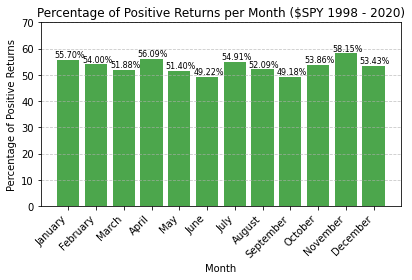

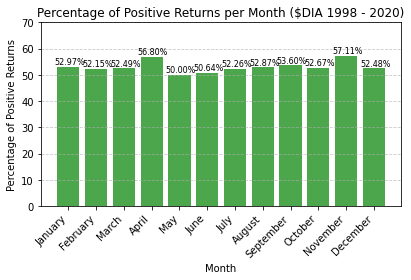

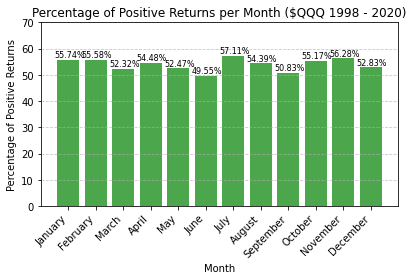

In [176]:
set = ['SPY', 'DIA', 'QQQ']
for ticker in set:
    
    # Define Dataset
    df = pd.read_csv(ticker+'.csv')

    # Convert 'Date' to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Calculate monthly returns
    df['Month'] = df['Date'].dt.month  # Extract month

    # Assign 1 if the month had a positive return, 0 otherwise
    df['PositiveReturn'] = (df['Close'].pct_change() > 0).astype(int)

    # Group by month and calculate the percentage of positive returns
    positive_returns_by_month = (df.groupby('Month')['PositiveReturn'].sum() / df.groupby('Month')['PositiveReturn'].count()) * 100

    # Plot bar chart
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    bars = plt.bar(months, positive_returns_by_month, color='green', alpha=0.7)

    # Display the percentage above each bar
    for bar, percent in zip(bars, positive_returns_by_month):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.5, bar.get_height() + 1, f'{percent:.2f}%', fontsize=8)

    # Rotate x-axis labels
    plt.xticks(rotation=45, ha='right')

    plt.title(f'Percentage of Positive Returns per Month (${ticker} 1998 - 2020)')
    plt.xlabel('Month')
    plt.ylabel('Percentage of Positive Returns')
    plt.ylim(0, 70)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


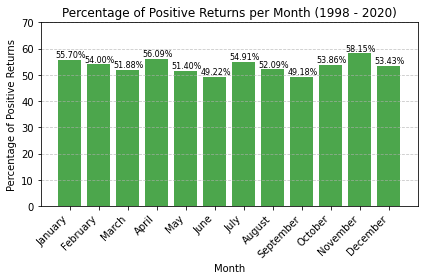

In [185]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("SPY.csv")

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate monthly returns
df['Month'] = df['Date'].dt.month  # Extract month

# Assign 1 if the month had a positive return, 0 otherwise
df['PositiveReturn'] = (df['Close'].pct_change() > 0).astype(int)

# Group by month and calculate the percentage of positive returns
positive_returns_by_month = (df.groupby('Month')['PositiveReturn'].sum() / df.groupby('Month')['PositiveReturn'].count()) * 100

# Plot bar chart
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bars = plt.bar(months, positive_returns_by_month, color='green', alpha=0.7)

# Display the percentage above each bar
for bar, percent in zip(bars, positive_returns_by_month):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.5, bar.get_height() + 1, f'{percent:.2f}%', fontsize=8)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.title('Percentage of Positive Returns per Month (1998 - 2020)')
plt.xlabel('Month')
plt.ylabel('Percentage of Positive Returns')
plt.ylim(0, 70)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


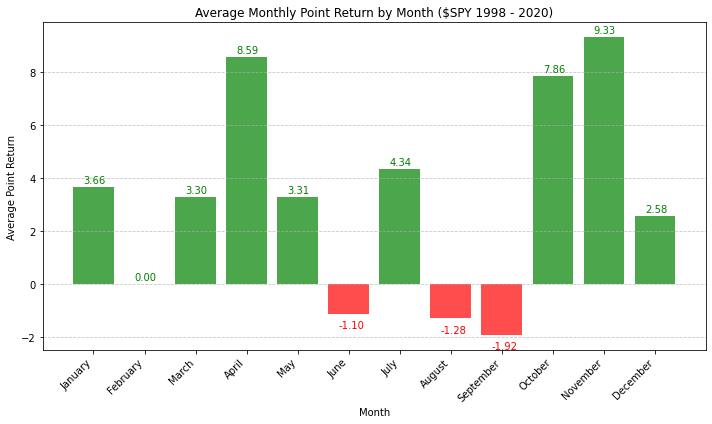

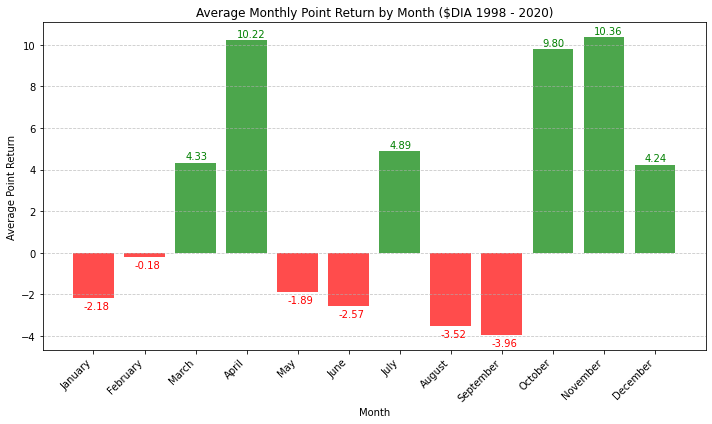

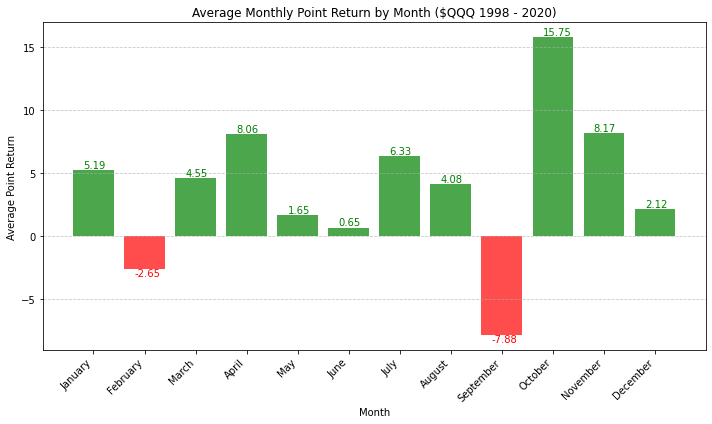

In [279]:
import pandas as pd
import matplotlib.pyplot as plt

set = ['SPY', 'DIA', 'QQQ']
for ticker in set:
    
    # Define Dataset
    df = pd.read_csv(ticker+'.csv')

    # Convert 'Date' to datetime format
    df['Date'] = pd.to_datetime(df['Date'])

    # Calculate monthly returns
    df['Month'] = df['Date'].dt.month  # Extract month

    # Calculate average point return per month
    average_returns_by_month = df.groupby('Month')['Close'].pct_change().groupby(df['Month']).mean()

    # Convert average returns to points (multiply by 10,000)
    average_returns_by_month *= 10000

    # Define the order of months
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(
        x=average_returns_by_month.index,
        height=average_returns_by_month,
        color=['green' if val >= 0 else 'red' for val in average_returns_by_month],
        alpha=0.7
    )

    # Display the average return above each bar
    for bar, point_return, month_name in zip(bars, average_returns_by_month, month_order):
        plt.text(
            x=bar.get_x() + bar.get_width() / 2 - 0.2,
            y=(bar.get_height() + 0.15) if point_return >= 0 else (bar.get_height() - 0.55),
            s=f'{point_return:.2f}',
            fontsize=10,
            color='green' if point_return >= 0 else 'red'
        )

    # Set the x-axis tick labels to month names in the specified order
    plt.xticks(average_returns_by_month.index, month_order, rotation=45, ha='right')

    # Add labels and title
    plt.title(f'Average Monthly Point Return by Month (${ticker} 1998 - 2020)')
    plt.xlabel('Month')
    plt.ylabel('Average Point Return')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

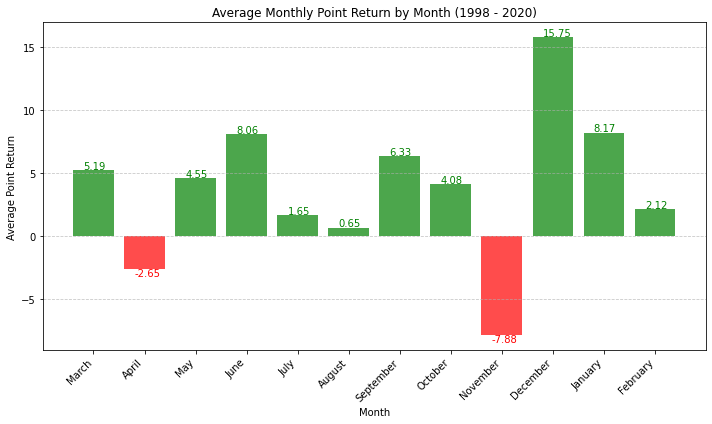

In [277]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("QQQ.csv")

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate monthly returns
df['Month'] = df['Date'].dt.month

# Calculate average point return per month
average_returns_by_month = df.groupby('Month')['Close'].pct_change().groupby(df['Month']).mean()

# Convert average returns to points (multiply by 10,000)
average_returns_by_month *= 10000

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(
    x=average_returns_by_month.index,
    height=average_returns_by_month,
    color=['green' if val >= 0 else 'red' for val in average_returns_by_month],
    alpha=0.7
)

# Display the average return above each bar
for bar, point_return, month_name in zip(bars, average_returns_by_month, df['Date'].dt.month_name().unique()):
    plt.text(
        x=bar.get_x() + bar.get_width() / 2 - 0.2,
        y=(bar.get_height() + 0.1) if point_return >= 0 else (bar.get_height() - 0.55),
        s=f'{point_return:.2f}',
        fontsize=10,
        color='green' if point_return >= 0 else 'red'
    )

# Set the x-axis tick labels to month names
plt.xticks(average_returns_by_month.index, df['Date'].dt.month_name().unique(), rotation=45, ha='right')

# Add labels and title
plt.title('Average Monthly Point Return by Month (1998 - 2020)')
plt.xlabel('Month')
plt.ylabel('Average Point Return')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

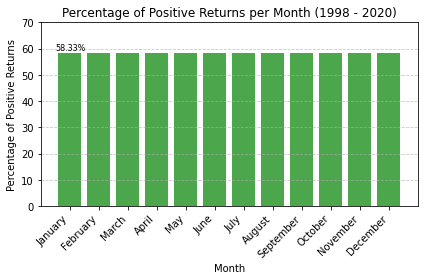

In [280]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("SPY.csv")

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate monthly returns
df['Month'] = df['Date'].dt.month  # Extract month

# Get the closing prices at the end of each month
end_of_month_prices = df.groupby('Month')['Close'].last()

# Calculate the percentage of positive returns
positive_returns_by_month = (end_of_month_prices.pct_change() > 0).sum() / len(end_of_month_prices) * 100

# Plot bar chart
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
bars = plt.bar(months, positive_returns_by_month, color='green', alpha=0.7)

# Display the percentage above each bar
plt.text(bars[0].get_x() + bars[0].get_width() / 2 - 0.5, bars[0].get_height() + 1, f'{positive_returns_by_month:.2f}%', fontsize=8)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

plt.title('Percentage of Positive Returns per Month (1998 - 2020)')
plt.xlabel('Month')
plt.ylabel('Percentage of Positive Returns')
plt.ylim(0, 70)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

